In [56]:
import nbsetup as nb
import numpy as np
import ensemblepy as ep
import pickle

from simulations.daisy_world.series import series

In [57]:
scan = pickle.load(open('../../datasets/daisy_adjusted.pickle', 'rb'))

In [58]:
x, plants, temps = [], [], []
tobs = np.array([[w.temperatures for w in worlds] for worlds in scan.values()])
mm = (tobs.min()-0.0001, tobs.max())
for i, worlds in scan.items():
    x.append(i)
    plants.append(ep.Discrete([w.observations() for w in worlds],  bins=(0,1,2), metrics=('incoherence', 'pooled', 'entropies')))
    temps.append(ep.Continuous([w.temperatures.flatten() for w in worlds], normalise=mm, metrics=('incoherence', 'pooled', 'entropies')))
    nb.cp(i)

1.7


[Text(0.5, 1.0, 'Incoherence of temperatures')]

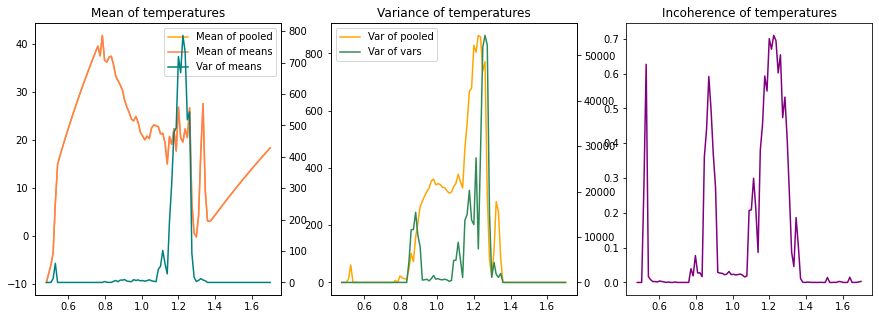

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
from ensemblepy.plots import combine_legends

fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))

twin = axes[0].twinx()
sns.lineplot(x=x, y=[np.mean(t.observations) for t in temps], label='Mean of pooled', ax=axes[0], color='orange')
sns.lineplot(x=x, y=[np.mean([np.mean(o) for o in t.observations]) for t in temps], label='Mean of means', ax=axes[0], color='coral')
sns.lineplot(x=x, y=[np.var([np.mean(o) for o in t.observations]) for t in temps], label='Var of means', ax=twin, color='teal')
axes[0].set(title='Mean of temperatures')
combine_legends(axes[0], twin)

twin = axes[1].twinx()
sns.lineplot(x=x, y=[np.var(t.observations) for t in temps], ax=axes[1], label='Var of pooled', color='orange')
sns.lineplot(x=x, y=[np.var([np.var(o) for o in t.observations]) for t in temps], ax=twin, label='Var of vars', color='seagreen')
combine_legends(axes[1], twin)
axes[1].set(title='Variance of temperatures')

sns.lineplot(x=x, y=[t.incoherence for t in temps], ax=axes[2], color='purple')
axes[2].set(title='Incoherence of temperatures')
#axes[2].set(xlabel='Key model parameter (Luminosity)')
#ep.plot_series(x, temps, legend_loc=None, xlabel='Luminosity', title='Incoherence of regional temperature distributions', ax=axes[1])
#ep.plot_series(x, plants, legend_loc=None, xlabel='Luminosity', title='Incoherence of plant distributions', ax=axes[2])

[Text(0.5, 1.0, 'Incoherence of temperatures')]

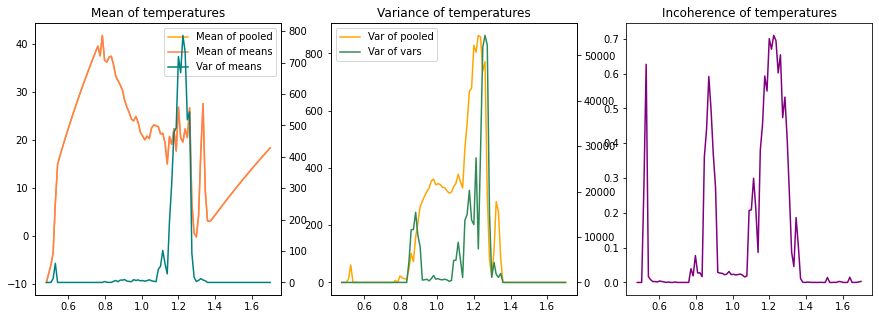

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from ensemblepy.plots import combine_legends

fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))

twin = axes[0].twinx()
sns.lineplot(x=x, y=[np.mean(t.observations) for t in temps], label='Mean of pooled', ax=axes[0], color='orange')
sns.lineplot(x=x, y=[np.mean([np.mean(o) for o in t.observations]) for t in temps], label='Mean of means', ax=axes[0], color='coral')
sns.lineplot(x=x, y=[np.var([np.mean(o) for o in t.observations]) for t in temps], label='Var of means', ax=twin, color='teal')
axes[0].set(title='Mean of temperatures')
combine_legends(axes[0], twin)

twin = axes[1].twinx()
sns.lineplot(x=x, y=[np.var(t.observations) for t in temps], ax=axes[1], label='Var of pooled', color='orange')
sns.lineplot(x=x, y=[np.var([np.var(o) for o in t.observations]) for t in temps], ax=twin, label='Var of vars', color='seagreen')
combine_legends(axes[1], twin)
axes[1].set(title='Variance of temperatures')

sns.lineplot(x=x, y=[t.incoherence for t in temps], ax=axes[2], color='purple')
axes[2].set(title='Incoherence of temperatures')
#axes[2].set(xlabel='Key model parameter (Luminosity)')
#ep.plot_series(x, temps, legend_loc=None, xlabel='Luminosity', title='Incoherence of regional temperature distributions', ax=axes[1])
#ep.plot_series(x, plants, legend_loc=None, xlabel='Luminosity', title='Incoherence of plant distributions', ax=axes[2])

In [2]:
pop3 = {'white': {'albedo': 0.75, 'initial': 0.3}, 'black': {'albedo': 0.25, 'initial': 0.3}}

# Self organised criticality

This often refers to criticality that exists within a system which is self organised. Here we see Daisyworld model is self organised, as based on a variety of macro-variables & micro-variables, the system tends to the same state. Most importantly, the point of the model is to show that the temperatures remain extremely consistent across no matter the luminosity value.

Below we ran the daisyworld experiment for 200 steps and for a range of luminosity values from 0.5 to 1.8. What we see here as the complexity trend values, is the mean of the final 50% of values.

In [3]:
wv = scan(luminosities=np.linspace(0.45, 1.5, 99), population=pop3, cp=nb.cp)

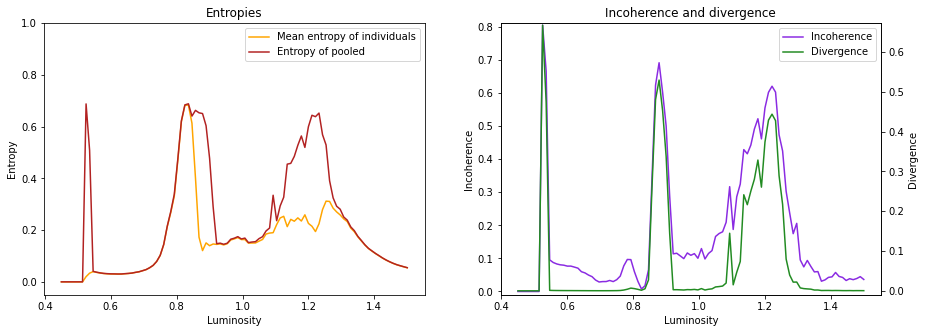

In [4]:
fig = wv.plot()

The complexity trends above 0.5 for the following luminosity values.

In [18]:
fig.savefig('figures/4.4-daisy-scan.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [5]:
df = wv.dataframe()
list(df.loc[df['complexity trend'] > 0.5].index)

[0.525,
 0.5357142857142857,
 0.8678571428571429,
 0.8785714285714286,
 0.8892857142857142,
 0.9,
 1.1785714285714286,
 1.2,
 1.2107142857142856,
 1.2214285714285715,
 1.2321428571428572]

## First critical point

The first is where the world goes from being too dark to be inhabitable at all. At the critical point, in some we find there's a critical mass of dark daisies that they begin to flourish, reducing the planet's albedo enough so that the temperature increases and the dark daises can populate to the optimal level for the planet. However, in others around that critical point we see that the entropy of the system drops off the zero, where all the plants have simply died out.

So effectively the system is mechanistic.

luminosity: 0.45


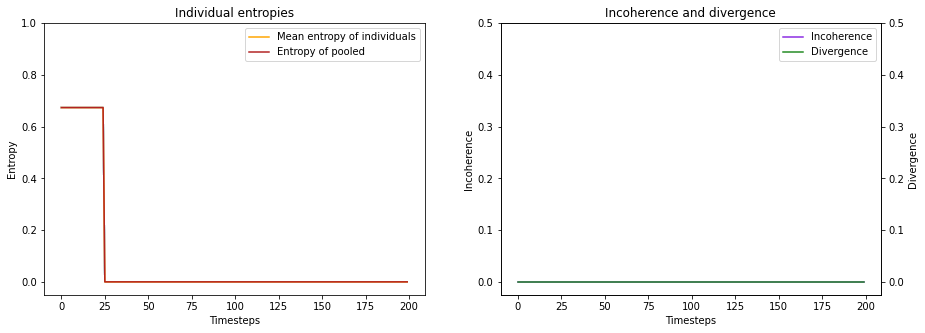

In [6]:
print("luminosity:", wv.x[0])
x = wv.y[0].plot()

Where as at the critical point, we can see some individual entropy lines crashing to zero as the system dies, while others surviving but simply tending to the same low entropy state as they reach a stable equilibrium of some black daises surviving.

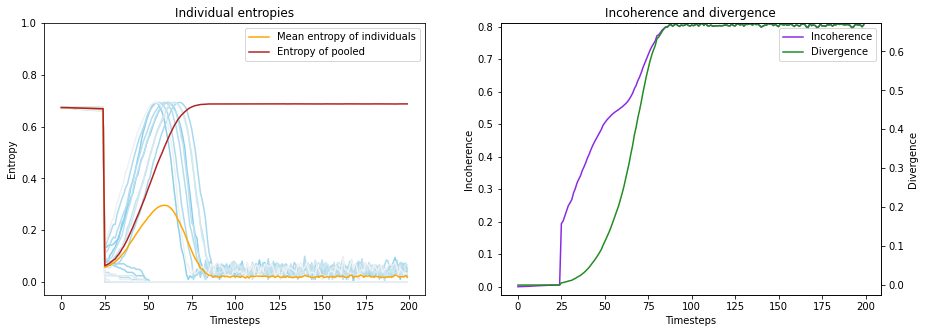

In [7]:
x = wv.map[0.525].plot()

## The second critical point

Has a similar picture, but where this is when both white and black daises can live together. But since this is a point of criticality, although when white daises do survive they self organise to a stable level, at this point of criticality the ergodic complexity arises because the systems self organise to different equilibriums.

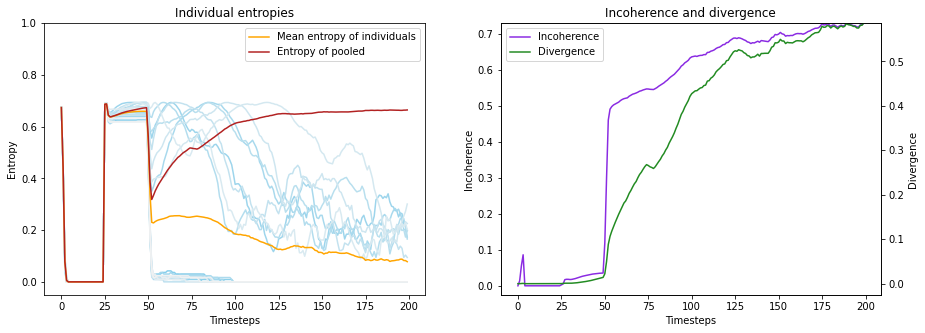

In [8]:
x = wv.map[0.8785714285714286].plot()

We can see this by looking around luminosity of 1.0, where the system becomes stable, they all tend to the same self organised distribution.

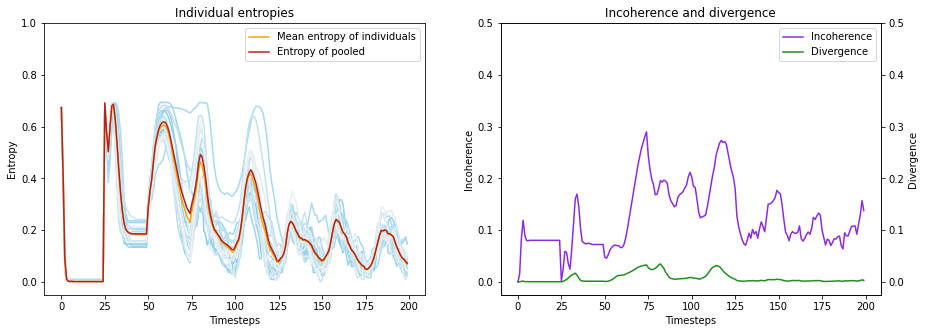

In [9]:
x = wv.map[1.0071428571428571].plot()

Looking the at histograms at the final step where 0 = no daises, 1 = white daises, 2 = black daises. We see their distributions are very similar, particularly comparing this to the ergodic complexity distribution.

<AxesSubplot:title={'center':'Distribution of all observations (pooled)'}, xlabel='value', ylabel='Probability'>

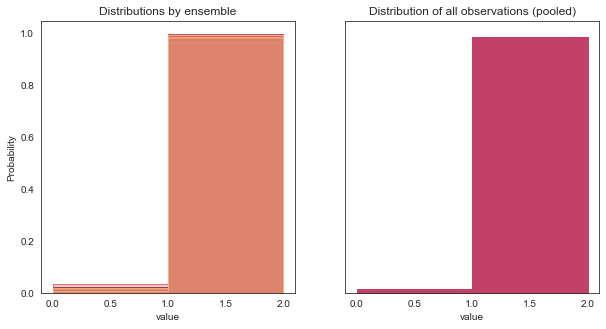

In [10]:
wv.map[1.0071428571428571].y[-1].plot()

##  Third peak

At the third peak the self organisation breaks down as the worlds can no longer sustain black daises. We start see many more worlds tending to zero and dieing out completely. While also a few worlds able to sustain some black daises but to varying degrees. Showing here that how "self organised" the system is during this period starts to break down, as it doesn't stablise into the same equilibrium everytime even when the world survives.

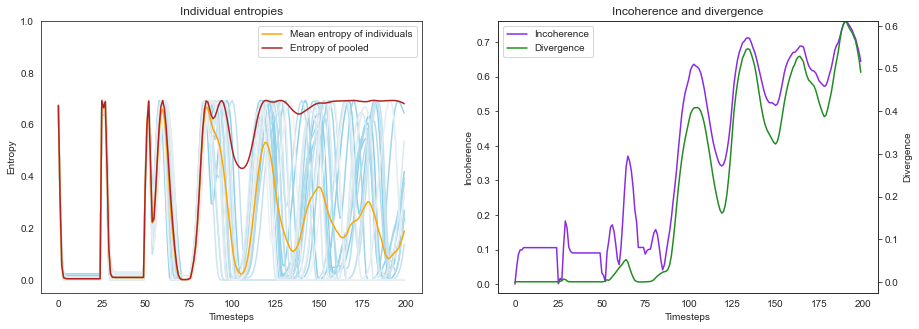

In [11]:
third_peak = wv.map[1.2321428571428572]
x = third_peak.plot()

<AxesSubplot:title={'center':'Distribution of all observations (pooled)'}, xlabel='value', ylabel='Probability'>

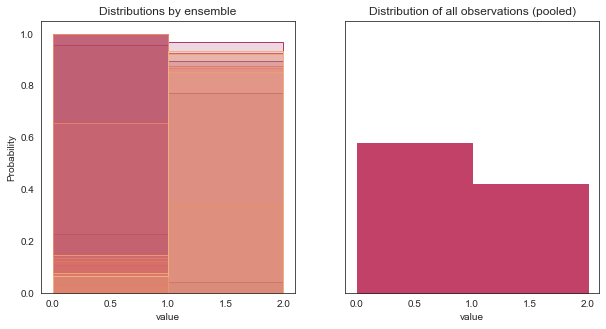

In [12]:
third_peak.y[-1].plot()

Then the left plotted as a ridge plot for clarity.

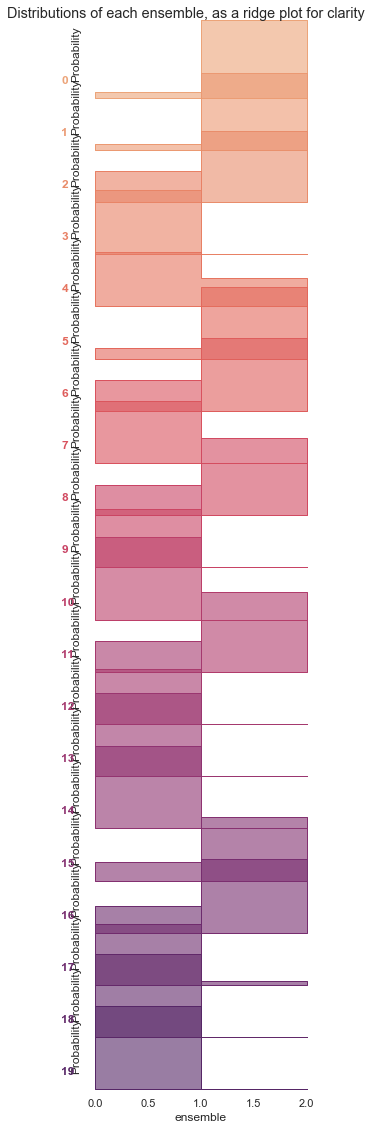

In [13]:
third_peak.y[-1].ridge()

## Final plot

While the final luminosity we inspected 1.8 shows that the world is now happily stable with only white daises.

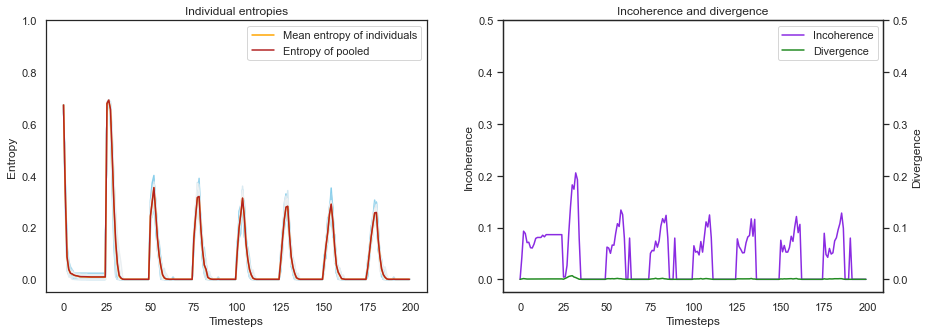

In [14]:
x = wv.y[-1].plot()

<AxesSubplot:title={'center':'Distribution of all observations (pooled)'}, xlabel='value', ylabel='Probability'>

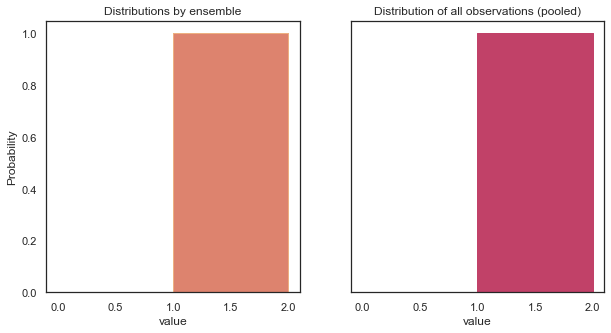

In [15]:
wv.y[-1].y[-1].plot()

## Figures for paper

In [16]:
if False:
    series(luminosity=0.525,population=pop3).plot().savefig('figures/4.4-daisy-0.525.eps')
    series(luminosity=0.8785714285714286,population=pop3).plot().savefig('figures/4.4-daisy-0.878.eps')
    series(luminosity=1.0,population=pop3).plot().savefig('figures/4.4-daisy-1.0.eps')
    series(luminosity=1.2321428571428572,population=pop3).plot().savefig('figures/4.4-daisy-1.23.eps')

In [19]:
if True:
    with open('daisyscan.pickle', 'wb') as fh:
        import pickle
        pickle.dump(wv, fh)